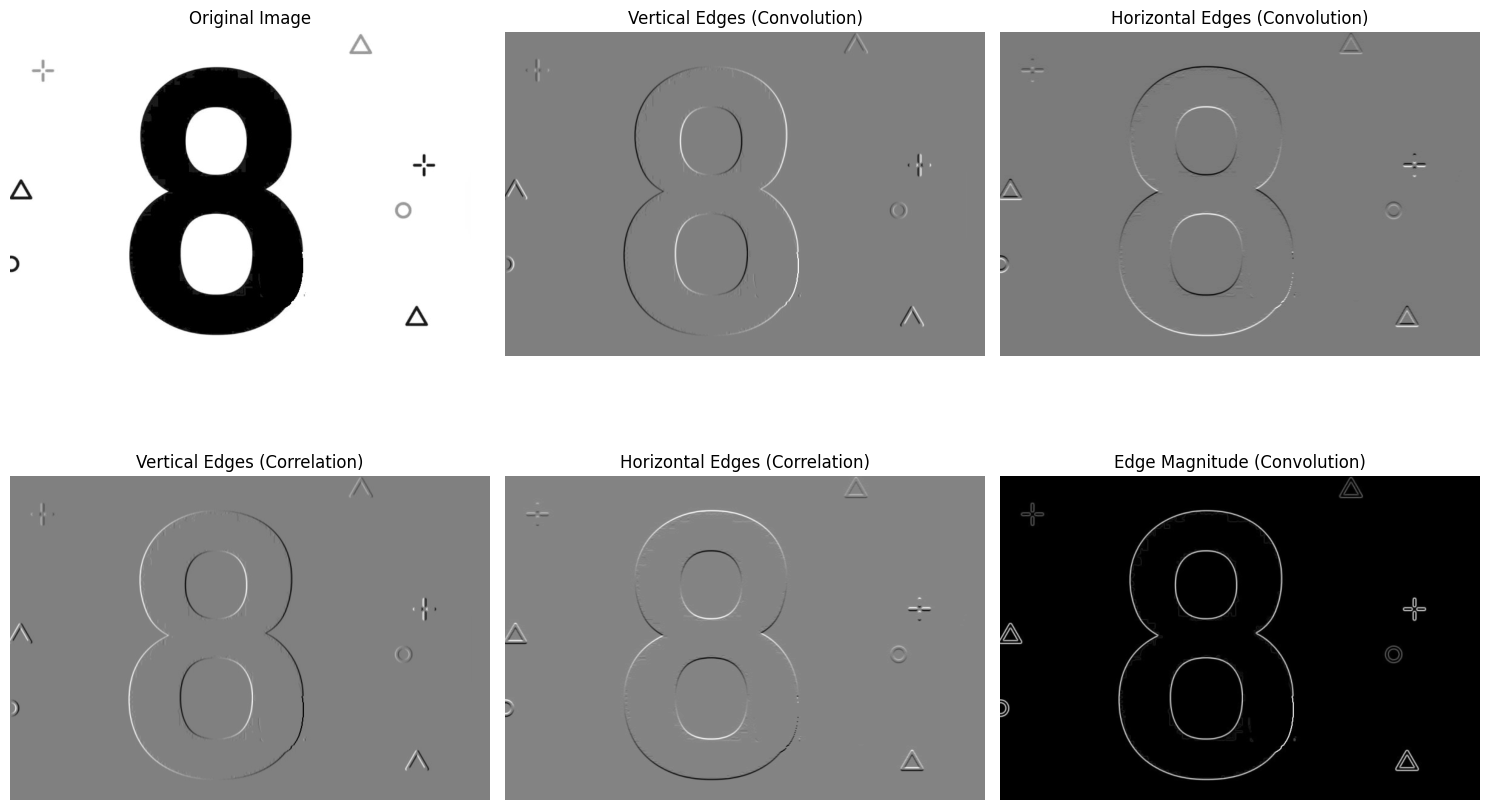

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2  # OpenCV for image loading and processing

# Load the image (grayscale)
img = cv2.imread('/content/Capture-pic.png', cv2.IMREAD_GRAYSCALE)  # replace 'image.jpg' with your image file path

# Sobel Kernels for edge detection
Kx = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]
])

Ky = np.array([
    [1, 2, 1],
    [0, 0, 0],
    [-1, -2, -1]
])

def convolution_2d(input_matrix, kernel):
    kernel_flipped = np.flip(np.flip(kernel, axis=0), axis=1)
    input_rows, input_cols = input_matrix.shape
    kernel_rows, kernel_cols = kernel.shape
    output_rows = input_rows - kernel_rows + 1
    output_cols = input_cols - kernel_cols + 1
    output = np.zeros((output_rows, output_cols))

    for i in range(output_rows):
        for j in range(output_cols):
            region = input_matrix[i:i + kernel_rows, j:j + kernel_cols]
            output[i, j] = np.sum(region * kernel_flipped)

    return output

def correlation_2d(input_matrix, kernel):
    input_rows, input_cols = input_matrix.shape
    kernel_rows, kernel_cols = kernel.shape
    output_rows = input_rows - kernel_rows + 1
    output_cols = input_cols - kernel_cols + 1
    output = np.zeros((output_rows, output_cols))

    for i in range(output_rows):
        for j in range(output_cols):
            region = input_matrix[i:i + kernel_rows, j:j + kernel_cols]
            output[i, j] = np.sum(region * kernel)

    return output

# Apply convolution and correlation to detect edges
convolution_result_x = convolution_2d(img, Kx)  # Vertical edges using convolution
convolution_result_y = convolution_2d(img, Ky)  # Horizontal edges using convolution

correlation_result_x = correlation_2d(img, Kx)  # Vertical edges using correlation
correlation_result_y = correlation_2d(img, Ky)  # Horizontal edges using correlation

# Combine the results to get the magnitude of the edges
edge_magnitude_convolution = np.sqrt(convolution_result_x**2 + convolution_result_y**2)
edge_magnitude_correlation = np.sqrt(correlation_result_x**2 + correlation_result_y**2)

# Displaying the results
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0, 0].imshow(img, cmap='gray')
axes[0, 0].set_title("Original Image")
axes[0, 0].axis('off')

axes[0, 1].imshow(convolution_result_x, cmap='gray')
axes[0, 1].set_title("Vertical Edges (Convolution)")
axes[0, 1].axis('off')

axes[0, 2].imshow(convolution_result_y, cmap='gray')
axes[0, 2].set_title("Horizontal Edges (Convolution)")
axes[0, 2].axis('off')

axes[1, 0].imshow(correlation_result_x, cmap='gray')
axes[1, 0].set_title("Vertical Edges (Correlation)")
axes[1, 0].axis('off')

axes[1, 1].imshow(correlation_result_y, cmap='gray')
axes[1, 1].set_title("Horizontal Edges (Correlation)")
axes[1, 1].axis('off')

axes[1, 2].imshow(edge_magnitude_convolution, cmap='gray')
axes[1, 2].set_title("Edge Magnitude (Convolution)")
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()
